<a href="https://colab.research.google.com/github/cybervalient/DeepMD_AWV/blob/main/Redes%20Bayesianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teorema de Bayes
Ir a la navegaciónIr a la búsqueda

Un letrero de neón que muestra el enunciado del teorema de Bayes
El teorema de Bayes, en la teoría de la probabilidad, es una proposición planteada por el matemático inglés Thomas Bayes (1702-1761)1​ y publicada póstumamente en 1763,2​ que expresa la probabilidad condicional de un evento aleatorio 
�
A dado 
�
B en términos de la distribución de probabilidad condicional del evento 
�
B dado 
�
A y la distribución de probabilidad marginal de solo 
�
A.

En términos más generales y menos matemáticos, el teorema de Bayes es de enorme relevancia puesto que vincula la probabilidad de 
�
A dado 
�
B con la probabilidad de 
�
B dado 
�
A. Es decir, por ejemplo, que sabiendo la probabilidad de tener un dolor de cabeza dado que se tiene gripe, se podría saber (si se tiene algún dato más), la probabilidad de tener gripe si se tiene un dolor de cabeza. Muestra este sencillo ejemplo la alta relevancia del teorema en cuestión para la ciencia en todas sus ramas, puesto que tiene vinculación íntima con la comprensión de la probabilidad de aspectos causales dados los efectos observados.
https://es.wikipedia.org/wiki/Teorema_de_Bayes

In [1]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00


In [33]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Crear modelo de red bayesiana
model = BayesianNetwork([('A1', 'Y'), ('A2', 'Y')])

In [63]:
# Definir las distribuciones de probabilidad condicional
# Definir las distribuciones de probabilidad condicional
cpd_clima = TabularCPD('A1',2, [[0.95], [0.05]])
cpd_temperatura = TabularCPD('A2', 3, [[0.97], [0.03],[0.0]])
cpd_lluvia = TabularCPD('Y',2,
                        [[0.75, 0.2, 0.6, 0.9], 
                         [0.25, 0.8, 0.4, 0.1]], 
                        evidence=['A1', 'A2'], 
                        evidence_card=[2, 2])
print(cpd_lluvia)

ValueError: ignored

In [61]:
# Asignar las distribuciones de probabilidad condicional al modelo
model.add_cpds(cpd_clima,cpd_temperatura,cpd_lluvia)

In [62]:
from pgmpy.inference import VariableElimination

# Crear objeto de inferencia
infer = VariableElimination(model)

# Calcular la probabilidad de lluvia dado el clima es frío y la temperatura es alta
q = infer.query(['Y'], evidence={'A1': 1, 'A2': 1})
print(q)

ValueError: ignored

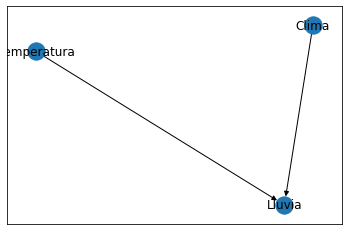

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un objeto de grafo NetworkX a partir del modelo de red bayesiana
G = nx.DiGraph(model.edges())
G.add_node('Clima')
G.add_node('Lluvia')
G.add_node('Temperatura')

# Dibujar grafo
nx.draw_networkx(G, with_labels=True)
plt.show()

In [ ]:
list(G.nodes(data=True))

[('Clima', {}), ('Lluvia', {}), ('Temperatura', {})]

Modelacinn con Redes Baysianas de una Base de concimiento

In [44]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import networkx as nx
import matplotlib.pyplot as plt

In [46]:

from google.colab import files  
uploaded = files.upload()
     

Saving RB.csv to RB.csv


In [47]:
import pandas as pd

df = pd.read_csv('RB.csv')

In [22]:
# Cargar datos
#= load_iris()
#df = pd.DataFrame(data=datos, columns=datos.feature_names)
#df = pd.read_csv('iris.csv')

In [48]:
# Crear modelo bayesiano
modelo = BayesianNetwork([('A1', 'Y'), ('A2', 'Y'), ('A3', 'Y'), ('A4', 'Y'), ('A5', 'Y')])#, ('A6', 'Y') , ('A7', 'Y'), ('A8', 'Y'), ('A9', 'Y'), ('A10', 'Y'), ('A11', 'Y'), ('A12', 'Y'), ('A13', 'Y'), ('A14', 'Y'), ('A15', 'Y')])

In [49]:
# Estimación de máxima verosimilitud de los parámetros
modelo.fit(df, estimator=MaximumLikelihoodEstimator)

# Estimación bayesiana de los parámetros
modelo.fit(df, estimator=BayesianEstimator)

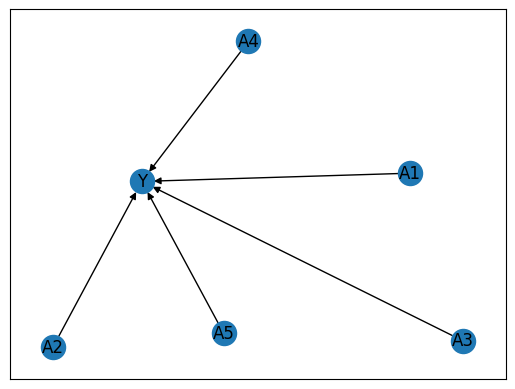

In [50]:
# Dibujar grafo
G = nx.DiGraph(modelo.edges())
#G.add_node('A1')
#G.add_node('A2')
#G.add_node('A3')
#G.add_node('A4')
nx.draw_networkx(G, with_labels=True)
plt.show()

In [51]:
# Imprimir las probabilidades condicionales
for cpd in modelo.get_cpds():
    print(cpd)

+-------+----------+
| A1(0) | 0.104651 |
+-------+----------+
| A1(1) | 0.895349 |
+-------+----------+
+------+----------------------+-----+-------+-------+
| A1   | A1(0)                | ... | A1(1) | A1(1) |
+------+----------------------+-----+-------+-------+
| A2   | A2(0)                | ... | A2(1) | A2(1) |
+------+----------------------+-----+-------+-------+
| A3   | A3(0)                | ... | A3(2) | A3(2) |
+------+----------------------+-----+-------+-------+
| A4   | A4(0)                | ... | A4(2) | A4(2) |
+------+----------------------+-----+-------+-------+
| A5   | A5(0)                | ... | A5(1) | A5(2) |
+------+----------------------+-----+-------+-------+
| Y(0) | 0.022123893805309734 | ... | 0.5   | 0.5   |
+------+----------------------+-----+-------+-------+
| Y(1) | 0.9778761061946902   | ... | 0.5   | 0.5   |
+------+----------------------+-----+-------+-------+
+-------+-----------+
| A2(0) | 0.0813953 |
+-------+-----------+
| A2(1) | 0.918605 

In [52]:
from pgmpy.inference import VariableElimination

# Crear objeto de inferencia
infer = VariableElimination(modelo)

# Calcular la probabilidad de lluvia dado el clima es frío y la temperatura es alta
q = infer.query(['Y'], evidence={'A1': 0, 'A3': 1})
print(q)

+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.5000 |
+------+----------+
| Y(1) |   0.5000 |
+------+----------+
